<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/supplements/logreg_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression <a class="anchor" id="logreg"></a>

In this notebook, we illustrate how to perform logistic regression using sklearn.  The code  is mostly based on 
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
by Aurelien Geron.


In [ ]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()


In [ ]:

# Initially use 1 feature, 2 classes
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0'

#log_reg = LogisticRegression(solver="lbfgs", penalty='none')
# Penalty='none' introduced in sklearn 0.21.
# For older versions, use this method:
log_reg = LogisticRegression(solver="lbfgs", C=1000)
log_reg.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


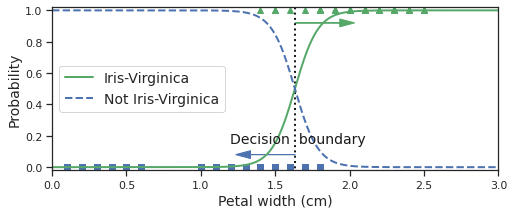

In [ ]:
# Plot decision boundary for range of 1d inputs

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("iris-logreg-1d.pdf")
plt.show()

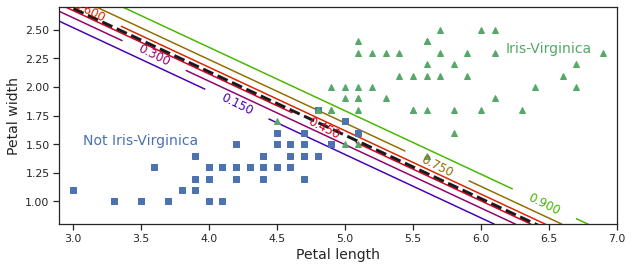

In [ ]:
# Now use 2 features, 2 classes

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

# penalty='none' is introduced in sklearn 0.21
#log_reg = LogisticRegression(solver="lbfgs", penalty='none')
# For older versions, we can simulate no regularization by using a large C
log_reg = LogisticRegression(solver="lbfgs", C=1000)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("iris-logreg-2d-2class.pdf")
plt.show()

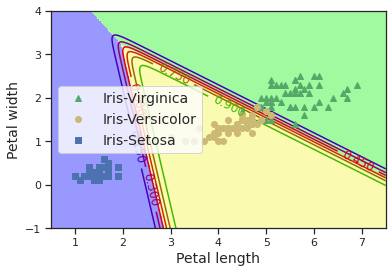

In [ ]:
# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

#softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="none")
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1000, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0.5, 7.5, 500).reshape(-1, 1),
        np.linspace(-1, 4, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure()
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
#custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']
#custom_cmap = ListedColormap(sns.color_palette())
                              
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
#save_fig("iris-logreg-2d-3class.pdf")
plt.show()



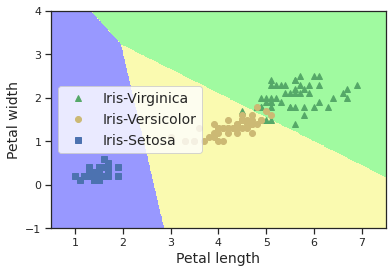

In [ ]:
plt.figure()
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
#plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
#plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
#save_fig("iris-logreg-2d-3class-noprobs.pdf")
plt.show()


In [ ]:
# Get predictive distribution for a single example
X = [[2.5, 3.0]] # (1,2) array
y_probs = softmax_reg.predict_proba(X)
print(np.round(y_probs, 2)) # [[0.01 0.4  0.6 ]]

[[0.01 0.4  0.6 ]]


In [ ]:
# Fit model and evaluate on separate test set

from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features to make problem harder
#X = iris.data # use all data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

#logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='none')
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
errs = (y_pred != y_test)
nerrs = np.sum(errs)
print("Made {} errors out of {}, on instances {}".format(nerrs, len(y_pred), np.where(errs)))
# With ndims=2: Made 10 errors out of 50, on instances
#  (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)


from sklearn.metrics import zero_one_loss
err_rate_test = zero_one_loss(y_test, y_pred)
assert np.isclose(err_rate_test, nerrs / len(y_pred))
err_rate_train =  zero_one_loss(y_train, logreg.predict(X_train))
print("Error rates on train {:0.3f} and test {:0.3f}".format(
    err_rate_train, err_rate_test))
#Error rates on train 0.180 and test 0.200


Made 10 errors out of 50, on instances (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)
Error rates on train 0.180 and test 0.200
